In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
iris

Iris has 4 features to describe plants:

In [14]:
iris['data']
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Apply PCA tp reduce the 4 to 2 dimensions, plot the result on a 2D plot 

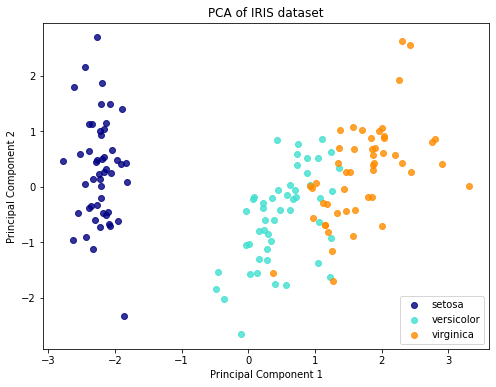

In [41]:
# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


How much of the information (variance) is explained by each principal axis?

In [23]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.72962445, 0.22850762])

The new data is the same length as the old one (15o data points). But this time we have 2 features instead of 3.

In [16]:
axis_1 = X_pca[:,0]
axis_2 = X_pca[:,1]

len(axis_1)

150

Let's make a pandas dataframe with the new data

In [18]:
import pandas as pd
import seaborn as sns

df = {'Principal axis 1': axis_1, 'Principal axis 2': axis_2, 'label': iris['target']}
df = pd.DataFrame(df)

When we have a pandas dataframe, we can use seaborn to synthetically make a scatterplot

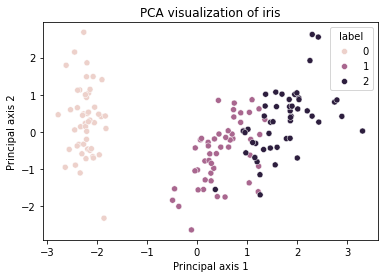

In [21]:
sns.scatterplot( data = df, x = 'Principal axis 1', y = 'Principal axis 2', 
                hue = 'label')
plt.title('PCA visualization of iris');

What if we reduce to three dimension instead of 2?

In [39]:
# Apply PCA to reduce the dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.72962445, 0.22850762, 0.03668922])

Make a 3D plot

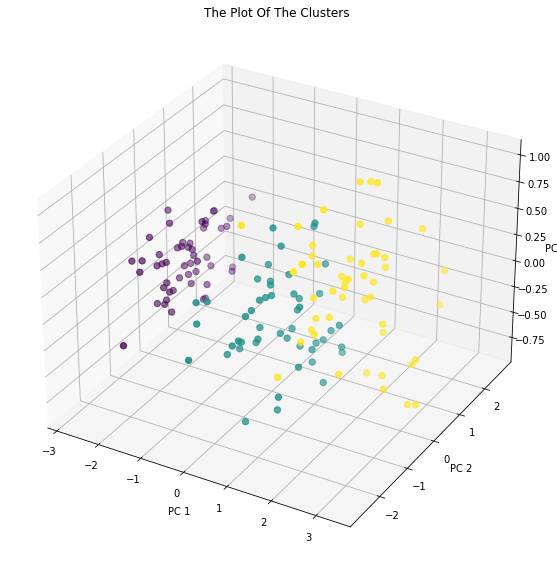

In [40]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], s=40, c= iris['target'], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.tight_layout()